In [1]:
from math import sin, cos, tan, acosh, pi, tanh, sinh, cosh, atanh
from poincare import HyperbolicLine, HyperbolicPoint
from poincare.poincaredisk import PoincareDiskModel
import matplotlib.pyplot as plot
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import show

Summary of circular and hyperbolic functions

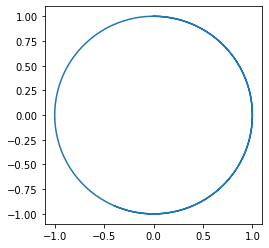

In [2]:
X= [x for x in range(314)] # (approx pi in hundredths)
S= [sin(x * np.pi /100 ) for x in X]
C= [cos(x * np.pi /100 ) for x in X]
plot.axes().set_aspect('equal')
plot.plot(S,C)

whereas the sine and cosine functions define the coordinate of a circle, for x in the range 1..pi

In [3]:
plot.show()

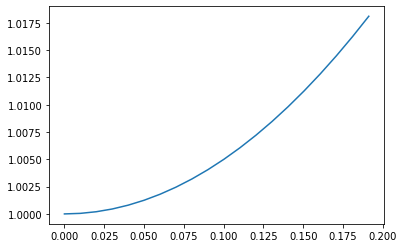

In [4]:
X= [x for x in range(20)]
S= [sinh(x/100) for x in X]
C= [cosh(x/100) for x in X]
plot.plot(S,C)


hyperbolic variants sinh and cosh map a hyperbolic curve

In [5]:
plot.show()

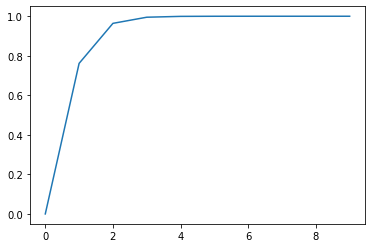

In [6]:
X= [x for x in range(10)]
T= [tanh(x) for x in X]
plot.plot(X,T)
plot.show()

draw some lines on a poincare disk (hyperbolic plane)

In geometry, the Poincaré disk model also called the conformal disk model, is a model of 2-dimensional hyperbolic geometry in which the points of the geometry are inside the unit disk, and the straight lines consist of all segments of circles contained within that disk that are orthogonal to the boundary of the disk, plus all diameters of the disk.

https://en.wikipedia.org/wiki/Poincaré_disk_model

draw some squares of various sizes, after defining hyp poly functions

In [7]:
pdm= PoincareDiskModel();

def hyp_poly(euclid_couples, major_radius_length=1):
    return[HyperbolicPoint( x/major_radius_length, y/major_radius_length) \
                     for x,y in euclid_couples]

def draw_hyp_poly(pdm, poly, major_radius_length= 1):
    hpoly= hyp_poly(poly, major_radius_length=major_radius_length)
    lines= [HyperbolicLine(hpoly[i], hpoly[i+1]) \
            for i in range( -1, len(hpoly)-1)]
    for l in lines:
          pdm.drawline( l)  

def move_x( quadrilateral, dx):
    return map( lambda p : (p[0]+dx, p[1]), quadrilateral)

def move_y( quadrilateral, dy):
    return map( lambda p : (p[0], p[1]+dy), quadrilateral)

right_quadrilateral= [ (-1,-1), (-1,1), (1,1), (1,-1)]

for dx in range ( -6,7,2):
    for dy in range ( -6,7,2):
        draw_hyp_poly( pdm, move_y( move_x( right_quadrilateral,dx),dy), major_radius_length= 10)

big= 9.9
draw_hyp_poly(pdm, [(-big,0),(0,big),(big,0),(0,-big)], major_radius_length= 10)

In [8]:
output_notebook()
pdm.show()

Loading BokehJS ...

The grid isn't projecting onto the sphere but using cartesian points mapped to hyperbolic lines.

In [9]:
pdm= PoincareDiskModel();

def arcpoint(frm,to):
    return ( HyperbolicPoint(sin(frm)*.9999, cos(frm)*.9999), \
                                HyperbolicPoint(sin(to)*.9999, cos(to)*.9999))

def cornerarc( pdm, frm, to):
    frm= pi*frm/180
    to= pi*to/180
    arc= arcpoint(frm,to)
    pdm.drawline(HyperbolicLine( arc[0], arc[1]))
    
for steps in range( 2, 12):
    for x in range( 0, 360 ,  int(360 / steps)):
        cornerarc(pdm, x, x + int(360 / steps))



pdm.show()

draw the triangle in fig 2.12

In [10]:
pdm= PoincareDiskModel();

triangle= [(0.3,0),(0.7,-.4),(0.1,-0.3)]
draw_hyp_poly(pdm, triangle)

cornerarc(pdm, -10,-100)
cornerarc(pdm, 10,-80)

HyperbolicPoint(.5,0).hyperbolic_circle( 0.4)
pdm.show()

